# A demonstration of creating and populating a traversible puzzle network

In [81]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import puzz

## Create a basic network

In [82]:
# initialize the network object with initial abilities a1 and a2
net = puzz.Network(['a1', 'a2'])

# create a few more obstacles and abilities
net.add_obstacle('o1')
net.add_obstacle('o2')
net.add_obstacle('o3')
net.add_obstacle('o4')
net.add_obstacle('o5')

net.add_ability('a3')
net.add_ability('a4')
net.add_ability('a5')

# print all of the node instances
net.nodes

# print the current graph
net.net

{'a1': <puzz.Ability at 0x111eef510>,
 'a2': <puzz.Ability at 0x111eef410>,
 'a3': <puzz.Ability at 0x111eef310>,
 'a4': <puzz.Ability at 0x111eef3d0>,
 'a5': <puzz.Ability at 0x111ec9090>,
 'o1': <puzz.Node at 0x111ad5f10>,
 'o2': <puzz.Node at 0x111d98d10>,
 'o3': <puzz.Node at 0x111ad56d0>,
 'o4': <puzz.Node at 0x111eefd90>,
 'o5': <puzz.Node at 0x111eefd50>,
 'start': <puzz.Node at 0x111eefdd0>}

{'a1': {'start'}, 'a2': {'start'}, 'start': set()}

In [83]:
# define which abilities defeat which obstacles
# note: a1, a3, and a5 all defeat o1.
net.defeats('a1', 'o1')

net.defeats('a2', 'o2')

net.defeats('a3', 'o3')
net.defeats('a3', 'o1')

net.defeats('a4', 'o4')

net.defeats('a5', 'o5')
net.defeats('a5', 'o1')

In [84]:
# check which nodes we can place next in the graph, after a1 and a2
net.enabled_nodes('a1', suppress_live=True)
net.enabled_nodes('a2', suppress_live=True)

{'o1': {'a1'}, 'o2': {'a2'}}

{'o1': {'a1'}, 'o2': {'a2'}}

enabled_nodes(node) returns a dictionary whose keys are the nodes that are placable after node, the values are the reasons why the node can be placed there.

An obstacle can be placed anywhere as long as the ability to defeat it already exists somewhere in the network. If an ability is already in the network, it is accessible to the player because of this definition.

## Growing the graph

In [85]:
# place o1 after a1
net.add_connection('a1', 'o1')

# place o2 after a2
net.add_connection('a2', 'o2')

net.net

{'a1': {'start'}, 'a2': {'start'}, 'o1': {'a1'}, 'o2': {'a2'}, 'start': set()}

In [86]:
# desired behavior: a3 and a5 eclipse a1. so you should only be able to
# place them strictly after a1.

# check which nodes we can place after o2
net.enabled_nodes('o2', suppress_live=True)

# notice that nodes after o1 contain a1 in their past.
# therefore we can place the eclipsed a3 and a5 after o1.
net.enabled_nodes('o1', suppress_live=True)

{'a4': set()}

{'a3': {'a1'}, 'a4': set(), 'a5': {'a1'}}

Ability a1 **eclipses** ability a2 if a1 can defeat all of the obstacles a2 can defeat. If a1 eclipses a2, then we must ensure that the player aquires a2 first, otherwise a2 serves no purpose. In terms of the directed network, this means that a2 must be somewhere in the path between start and a1: these nodes are guaranteed to have been visited by the time the player gets to a1.

The idea here is that you don't want the player to aquire invincibility before armor, for example.

## Visualize the network

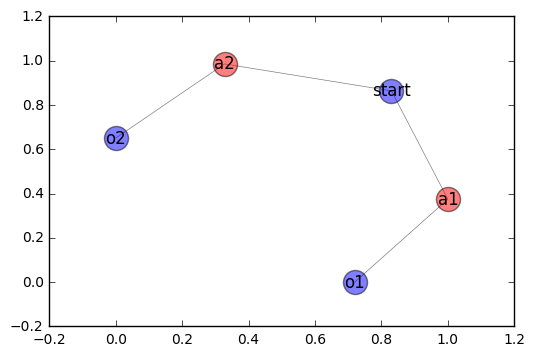

In [87]:
net.plot()

## Add an AND condition

In [88]:
# obstacle o6 requires both a3 and a4 to be defeated.
net.add_obstacle('o6')
net.defeats(('a3', 'a4'), 'o6')

# the player unlocks a3.
net.add_connection('o1', 'a3')

# show the obstacles that we could add after a3.
# it does not include o6 because we haven't unlocked a4 yet.
net.enabled_nodes('a3', suppress_live=True)

# the player unlocks a4 off the other branch of the graph.
net.add_connection('o2', 'a4')

# now that both a3 and a4 are unlocked, o6 is enabled
net.enabled_nodes('a4', suppress_live=True)
net.enabled_nodes('a4', suppress_live=True)

# let's add o6 after a4.
net.add_connection('a4', 'o6')

{'o3': {'a3'}}

{'o3': {'a3'}, 'o4': {'a4'}, 'o6': {('a3', 'a4')}}

{'o3': {'a3'}, 'o4': {'a4'}, 'o6': {('a3', 'a4')}}

In [89]:
# for clarity, let's have o6 then unlock a new ability, a5
net.add_connection('o6', 'a5')

# let's also add an endpoint obstacle
net.add_obstacle('end')
net.defeats('a5', 'end')
net.add_connection('a5', 'end')

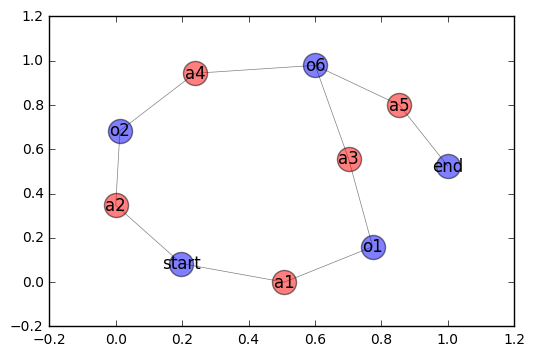

In [90]:
# redraw the graph to show the results
net.plot()